# Projet Data Science - Simulateur de DPE
## ENSAE Paris - 2A

Membres du groupe : 
- Wiam LACHQER , Amine RAZIG , Julien BOUDIER

Ce projet Python a été créé dans le but de fournir des visualisations variées des données et de mettre en place un simulateur de Diagnostic de Performance Energétique (DPE) à partir de la base de données de l'ADEME (Agence de la Transition Écologique).

## Objectifs du Projet

1. **Visualisations de Données :** Le projet propose différentes visualisations des données issues de la base de l'ADEME. Ces visualisations permettent une compréhension approfondie des caractéristiques énergétiques des logements.

2. **Simulateur de DPE :** Un simulateur de DPE a été développé en utilisant les données de l'ADEME. Ce simulateur permet d'estimer la performance énergétique d'un logement en fonction de divers paramètres.

In [1]:
# !pip install -q -r requirements.txt

In [7]:
# Importation des bibliothèques qu’on va utiliser
import fetchdata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [8]:
import fetchdata

chosen_variables=['Etiquette_GES',
                  'Etiquette_DPE',
                  'Année_construction',
                  'Type_bâtiment',
                  'Période_construction',
                  'Hauteur_sous-plafond',
                  'Surface_habitable_logement',
                  'Classe_altitude',
                  'Zone_climatique_',
                  'Nom__commune_(BAN)',
                  'Coordonnée_cartographique_X_(BAN)',     
                  'Coordonnée_cartographique_Y_(BAN)',
                  'N°_région_(BAN)',
                  'Conso_5_usages_é_finale',
                  'Conso_5_usages/m²_é_finale',
                  'Conso_chauffage_é_finale',
                  'Emission_GES_5_usages',
                  'Emission_GES_5_usages_par_m²',
                  'Conso_5_usages_é_finale_énergie_n°1',
                  'Coût_total_5_usages_énergie_n°1',
                  'Conso_5_usages_é_finale_énergie_n°2',
                  'Coût_total_5_usages_énergie_n°2',
                  'Conso_5_usages_é_finale_énergie_n°3',
                  'Coût_total_5_usages_énergie_n°3',
                  'Coût_total_5_usages',
                  'Qualité_isolation_enveloppe',
                  'Qualité_isolation_menuiseries',
                  'Qualité_isolation_murs',
                  'Qualité_isolation_plancher_bas',
                  'Type_énergie_principale_chauffage',
                  'Type_énergie_principale_ECS',
                  'Type_énergie_n°1',
                  'Type_installation_ECS',
                  'Type_installation_solaire',
                  'Surface_climatisée',               
                  'Type_ventilation']
df_DPE = fetchdata.get_dpe(chosen_variables, size =100)


Fetched 10000 observations


In [3]:
df_DPE.head()

,Coût_total_5_usages_énergie_n°3,Coût_total_5_usages_énergie_n°2,Nom__commune_(BAN),Coût_total_5_usages_énergie_n°1,Qualité_isolation_enveloppe,Type_installation_ECS,Coût_total_5_usages,Emission_GES_5_usages,Qualité_isolation_menuiseries,Qualité_isolation_murs,...,Hauteur_sous-plafond,Surface_habitable_logement,Coordonnée_cartographique_Y_(BAN),Période_construction,Classe_altitude,Type_énergie_principale_ECS,Type_énergie_principale_chauffage,_score,Type_installation_solaire,Surface_climatisée
0,519.0,342.0,Besançon,1841.0,insuffisante,installation individuelle,2702.0,5960.8,bonne,insuffisante,...,2.9,220.8,6685893.59,avant 1948,inférieur à 400m,Gaz naturel,Gaz naturel,None,NaN,NaN
1,NaN,913.7,Gardanne,913.7,insuffisante,installation individuelle,913.7,2152.0,moyenne,insuffisante,...,2.5,50.0,6264735.98,1948-1974,inférieur à 400m,Gaz naturel,Électricité,None,NaN,NaN
2,135.4,63.9,Avelin,602.0,très bonne,installation individuelle,801.3,1383.1,très bonne,très bonne,...,2.5,93.0,7050886.59,2013-2021,inférieur à 400m,Gaz naturel,Gaz naturel,None,NaN,NaN
3,160.9,286.6,Saint-Herblain,368.9,insuffisante,NaN,702.1,1027.7,moyenne,insuffisante,...,2.5,47.5,6689778.71,1975-1977,NaN,NaN,NaN,None,NaN,NaN
4,NaN,2337.8,Bourg-la-Reine,2337.8,insuffisante,installation collective,2337.8,3672.5,moyenne,insuffisante,...,2.5,109.0,6853587.72,1983-1988,inférieur à 400m,Réseau de Chauffage urbain,Électricité,None,NaN,NaN


In [5]:
df_DPE.axes[1][0]

'Coût_total_5_usages_énergie_n°3'

Le simulateur de DPE en fonction d’informations accessibles pour le propriétaire et le locataire: 

In [ ]:
# IMPORTATION DE LA LISTE DES VARIABLES DISPONIBLES SUR L'API : 

data_path = '/Users/aminerazig/Desktop/ENSAE 2A/Projet-Python/DATA'
liste_variables = pd.read_excel(data_path + '/description_variables.xlsx')
liste_variables

## Mise en place de la base de données exploitable. 
L'objectif est de selectionner et de modifier certaines variables afin qu'elles puissent etre utilisées efficacement dans nos analyses.

### Traitement des valeurs manquantes : 

In [9]:
import explodata
# we use the function in the file explo data

explodata.create_unique(df_DPE)

,Column_name,Data_type,Number_of_unique,Number_of_missing,Percentage_of_missing,Unique_values
0,Coût_total_5_usages_énergie_n°3,float64,1930,7674,0.7674,More than 15 unique values
1,Type_énergie_n°1,object,12,0,0.0000,"[Gaz naturel, Réseau de Chauffage urbain, Élec..."
2,Coût_total_5_usages_énergie_n°2,float64,5227,1815,0.1815,More than 15 unique values
3,Nom__commune_(BAN),object,3727,81,0.0081,More than 15 unique values
4,Coût_total_5_usages_énergie_n°1,float64,6948,0,0.0000,More than 15 unique values
5,Qualité_isolation_enveloppe,object,4,0,0.0000,"[insuffisante, très bonne, bonne, moyenne]"
6,Type_installation_ECS,object,3,46,0.0046,"[installation individuelle, nan, installation ..."
7,Coût_total_5_usages,float64,7084,0,0.0000,More than 15 unique values
8,Emission_GES_5_usages,float64,8438,0,0.0000,More than 15 unique values
9,Qualité_isolation_menuiseries,object,4,0,0.0000,"[bonne, moyenne, très bonne, insuffisante]"


In [ ]:
#-------------------------------------------------------------------------------------------------------
## Traitement spécifique 
#-------------------------------------------------------------------------------------------------------

# Suppression des lignes dans lesquelles la surface habitable est non renseignée
df_DPE=df_DPE[df_DPE["Surface_habitable_logement"].notna()]
df_DPE=df_DPE[df_DPE["Qualité_isolation_plancher_bas"].notna()]

# Pour les données qui ont Type_énergie_principale_ECS=Nan ou Type_énergie_principale_chauffage=Nan, on remplit ces cases par Type_énergie_n°1
df_DPE["Type_énergie_principale_ECS"].fillna(df_DPE["Type_énergie_n°1"], inplace = True)
df_DPE["Type_énergie_principale_chauffage"].fillna(df_DPE["Type_énergie_n°1"], inplace = True)

# Remplacez tous les types de bois dans la varaible 'Type_énergie_principale_chauffage' par 'bois'
df_DPE['Type_énergie_principale_chauffage'] = df_DPE['Type_énergie_principale_chauffage'].replace(['Bois – Bûches','Bois – Granulés (pellets) ou briquettes', 'Bois – Plaquettes d’industrie', 'Bois – Plaquettes forestières'], 'Bois')
# Remplacez tous les types de bois dans la varaible 'Type_énergie_principale_ECS' par 'bois'
df_DPE['Type_énergie_principale_ECS'] = df_DPE['Type_énergie_principale_ECS'].replace(['Bois – Bûches','Bois – Granulés (pellets) ou briquettes', 'Bois – Plaquettes d’industrie', 'Bois – Plaquettes forestières'], 'Bois')

# La simulation portera uniquement sur les maisons et les appartements, on supprime les immeubles
df_DPE=df_DPE[df_DPE["Type_bâtiment"]!="immeuble"]
df_DPE = pd.get_dummies(df_DPE, columns=['Type_bâtiment'])


In [10]:
import explodata
#-------------------------------------------------------------------------------------------------------
## traitement général ( supp valeurs manquantes +60%, conversion variables en encoded)
#-------------------------------------------------------------------------------------------------------
df_DPE = explodata.clean_na(df_DPE)
explodata.create_unique(df_DPE)


The list of variables deleted is : ['Coût_total_5_usages_énergie_n°3', 'Conso_5_usages_é_finale_énergie_n°3', '_score', 'Type_installation_solaire', 'Surface_climatisée']


,Column_name,Data_type,Number_of_unique,Number_of_missing,Percentage_of_missing,Unique_values
0,Type_énergie_n°1,object,12,0,0.000000,"[Gaz naturel, Réseau de Chauffage urbain, Élec..."
1,Coût_total_5_usages_énergie_n°2,float64,5124,1770,0.181893,More than 15 unique values
2,Nom__commune_(BAN),object,3623,71,0.007296,More than 15 unique values
3,Coût_total_5_usages_énergie_n°1,float64,6789,0,0.000000,More than 15 unique values
4,Qualité_isolation_enveloppe,object,4,0,0.000000,"[insuffisante, très bonne, bonne, moyenne]"
5,Type_installation_ECS,object,3,45,0.004624,"[installation individuelle, nan, installation ..."
6,Coût_total_5_usages,float64,6868,0,0.000000,More than 15 unique values
7,Emission_GES_5_usages,float64,8220,0,0.000000,More than 15 unique values
8,Qualité_isolation_menuiseries,object,4,0,0.000000,"[bonne, moyenne, très bonne, insuffisante]"
9,Qualité_isolation_murs,object,4,0,0.000000,"[insuffisante, très bonne, moyenne, bonne]"


## Analyse descriptive de la base de donnée : 
- répartition des types d'énergies principaux des logements ?
- type de chauffage utilisé en majorité selon la note de l'étiquette DPE ? 
- etiquette DPE en fonction des codes postaux (représentation cartographique ? ) rq => ajouter dans la base de donnéee les données géo
- etiquette DPE en fonction de l'année de construction ?
- surface habitable 

rq :  quels sont les variables cibles dans la base ? on cherche a prédri les consos, les émissions etc... Objectifs avec ces variables est de faire un indicateur de performanace énergétiques et ensuite de le prédire. 

Méthodologie => se baser sur la litterature pour comprendre les indicateurs majeur de performance énergetique, création de l'indice en attribuant des poids aux varaibles cibles, les normaliser ? moyenne ? 




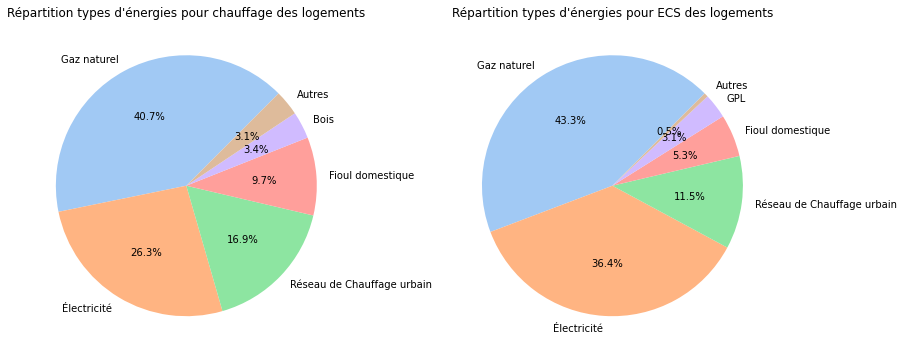

In [17]:
# Analyse descriptive de la base de donnée : 
bd_dpe = df.copy()

# répartition des types d'energies de chauffage  des logements : 
comptage_type_energie = bd_dpe['Type_énergie_principale_chauffage'].value_counts()


### REPRESENTATION GRAPHIQUE 
# Calcul des pourcentages pour chaque type d'énergie
pourcentages_chauffage = (comptage_type_chauffage / len(bd_dpe)) * 100
pourcentages_ECS = (comptage_type_ECS / len(bd_dpe)) * 100

# Seuil pour regrouper les petites catégories sous "Autres"
seuil = 3

# Regroupement des petites catégories sous "Autres" si leur pourcentage est inférieur au seuil
autres_chauffage = pourcentages_chauffage[pourcentages_chauffage < seuil].sum()
autres_ECS = pourcentages_ECS[pourcentages_ECS < seuil].sum()

# Création de nouveaux tableaux pour le graphique avec "Autres"
nouveaux_pourcentages_chauffage = pourcentages_chauffage[pourcentages_chauffage >= seuil]
nouveaux_pourcentages_chauffage['Autres'] = autres_chauffage

nouveaux_pourcentages_ECS = pourcentages_ECS[pourcentages_ECS >= seuil]
nouveaux_pourcentages_ECS['Autres'] = autres_ECS

# Création des graphiques
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Graphique pour le chauffage
axes[0].pie(x=nouveaux_pourcentages_chauffage, labels=nouveaux_pourcentages_chauffage.index, startangle=45,
            colors=sns.color_palette('pastel', len(nouveaux_pourcentages_chauffage)), autopct='%1.1f%%')
axes[0].set_title('Répartition types d\'énergies pour chauffage des logements')

# Graphique pour l'ECS
axes[1].pie(x=nouveaux_pourcentages_ECS, labels=nouveaux_pourcentages_ECS.index, startangle=45,
            colors=sns.color_palette('pastel', len(nouveaux_pourcentages_ECS)), autopct='%1.1f%%')
axes[1].set_title('Répartition types d\'énergies pour ECS des logements')

# Affichage des graphiques
plt.show()


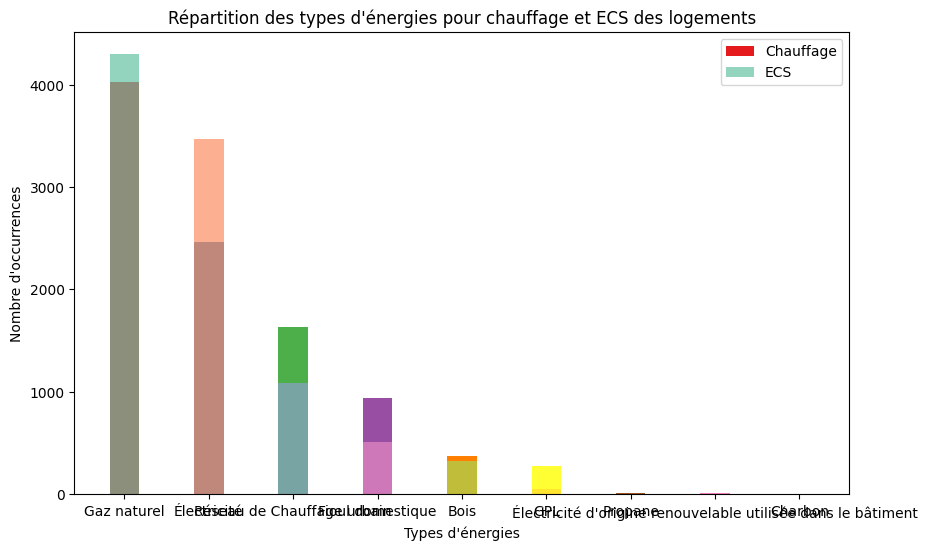

In [20]:

# TYPE DE REPRESENTATIONA REVOIR /!\ pas tres visuelle

# Comptage pour 'Type_énergie_principale_chauffage'
comptage_type_chauffage = bd_dpe['Type_énergie_principale_chauffage'].value_counts()
colors_ECS = sns.color_palette('Set2')[0:len(comptage_type_ECS)]

# Comptage pour 'type_principale_energie_ECS'
comptage_type_ECS = bd_dpe['Type_énergie_principale_ECS'].value_counts()
colors_chauffage = sns.color_palette('Set1')[0:len(comptage_type_chauffage)]

# Création du graphique en barres superposées
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(comptage_type_chauffage))

# Barres pour 'Type_énergie_principale_chauffage'
plt.bar(index, comptage_type_chauffage, bar_width, color=colors_chauffage, label='Chauffage')

# Barres pour 'type_principale_energie_ECS'
plt.bar(index, comptage_type_ECS, bar_width, color=colors_ECS, label='ECS', alpha=0.7)

# Ajout des labels, titres, et légende
plt.xlabel('Types d\'énergies')
plt.ylabel('Nombre d\'occurrences')
plt.title('Répartition des types d\'énergies pour chauffage et ECS des logements')
plt.xticks(index, comptage_type_chauffage.index)
plt.legend()

# Affichage du graphique
plt.show()

## GEOLOCALISATION : 
Repésentation géographique des données à l'aide de géopandas 
Voici une liste non exhaustive des varaibles que nous utilisons pour cette partie : 

Variables à utiliser :
- Coordonnée_cartographique_X_(BAN)
- Coordonnée_cartographique_Y_(BAN)	
- Nom__commune_(BAN)
- N°_région_(BAN)
- Zone_climatique_
- Classe_altitude

Variables d'intérets : 
- Conso_5_usages_é_finale
- Etiquette_DPE	

La France compte 3 zones climatiques définies sur base des températures hivernales et estivales des régions qui les composent :
 
> La zone climatique **H1** est la zone la plus étendue. C’est là que sont relevées les températures les plus froides. L’hiver y est long. Les pluies sont fréquentes. Elle couvre toute la moitié nord-est de la France et descend jusqu’à Lyon ;

>La zone climatique **H2** correspond au reste de la France, de la zone nord-ouest à sud-ouest, à l’exception du bassin méditerranéen. Les températures y sont plus douces et l’hiver moins marqué. Les pluies peuvent être importantes tout au long de l’année ;

>La zone climatique **H3** constitue une bande sur le pourtour méditerranéen du sud-est de la France. C’est la zone avec les températures les plus chaudes et un hiver très doux. Les pluies y sont rares et brèves. Elle englobe également les DOM-TOM.
https://www.effy.fr/aide-energetique/zoom-sur-les-zones-climatiques-de-france

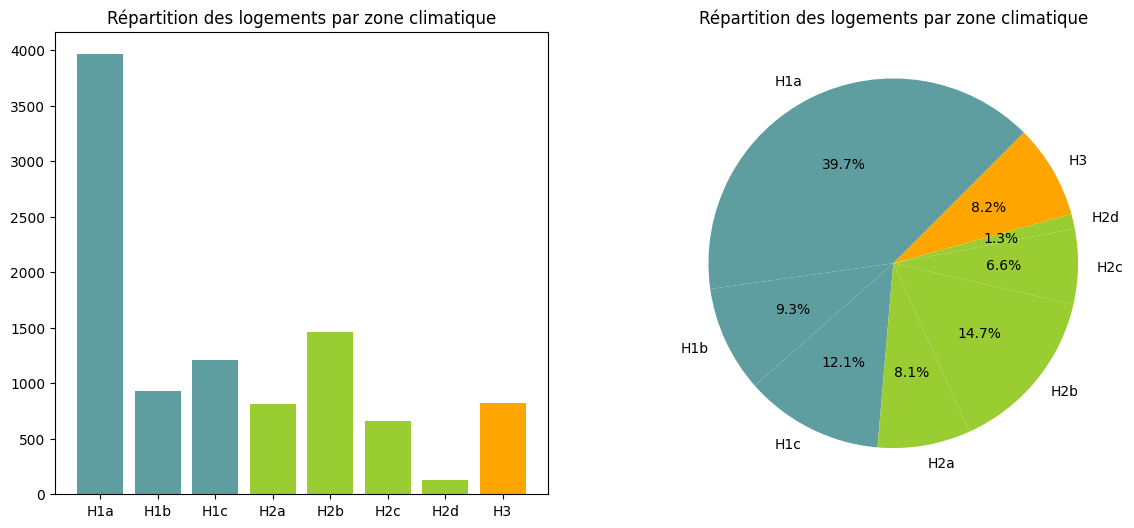

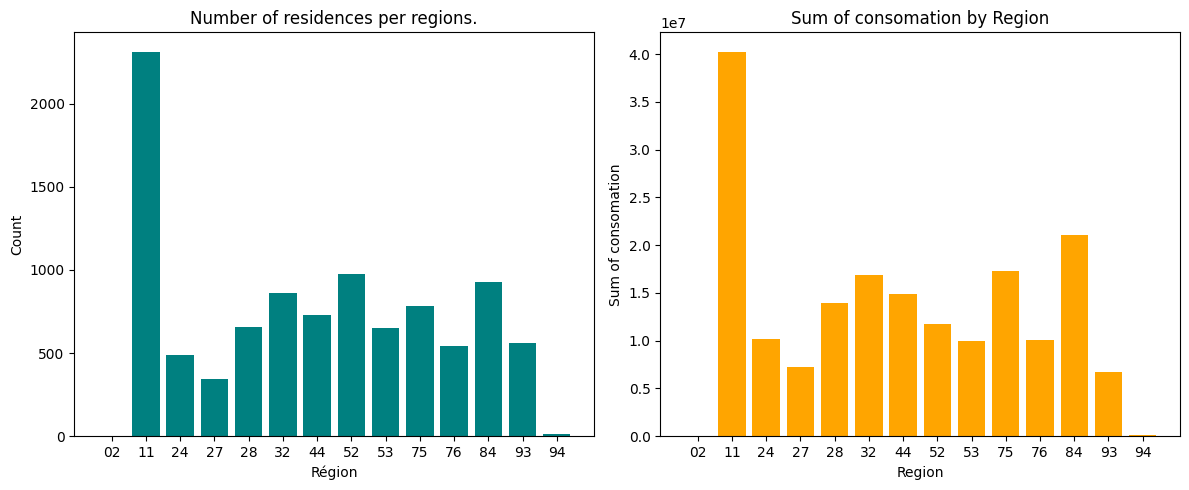

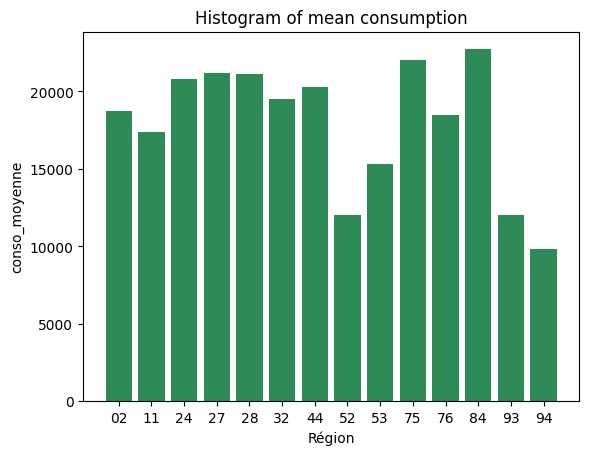

In [70]:
# DEBUT DES EXPLORATIONS - taches à effectuer : 

    ####### répartition des logemenst de la base pat zone climatique 
# Création de deux graphiques (en barre et circulaire)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

val = df_DPE['Zone_climatique_'].value_counts().sort_index()
colors= 3*['cadetblue'] + 4*['yellowgreen'] + ['orange']


axes[0].bar(val.index, val, color= colors)
axes[0].set_title('Répartition des logements par zone climatique')
explode = (0, 0, 0, 0, 0, 0, 0, 0)
axes[1].pie(x=val, labels=val.index, startangle=45,colors=colors, autopct='%1.1f%%', explode = explode)
axes[1].set_title('Répartition des logements par zone climatique')



fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    ####### Premier sous-graphique : Répartition des logements par région
val_region = df_DPE['N°_région_(BAN)'].value_counts().sort_index()
axs[0].bar(val_region.index, val_region, color='teal')
axs[0].set_xlabel('Région')
axs[0].set_ylabel('Count')
axs[0].set_title('Number of residences per regions.')

    ####### Deuxième sous-graphique : Classement des régions par consommation
comptage_conso_region = df_DPE.groupby('N°_région_(BAN)')['Conso_5_usages_é_finale'].sum()
axs[1].bar(comptage_conso_region.index, comptage_conso_region, color='orange')
axs[1].set_xlabel('Region')
axs[1].set_ylabel('Sum of consomation')
axs[1].set_title('Sum of consomation by Region')

plt.tight_layout()
plt.show()

    ####### consomation moyen d'un logement par région : 
df_conso_regions = pd.merge(comptage_conso_region, val_region, on ='N°_région_(BAN)')
df_conso_regions['conso_moyenne'] = df_conso_regions['Conso_5_usages_é_finale']/df_conso_regions['count']
df_conso_regions

plt.bar(df_conso_regions.index, df_conso_regions['conso_moyenne'], color= 'seagreen')

plt.xlabel('Région')
plt.ylabel('conso_moyenne')
plt.title('Histogram of mean consumption')
plt.show()    
    

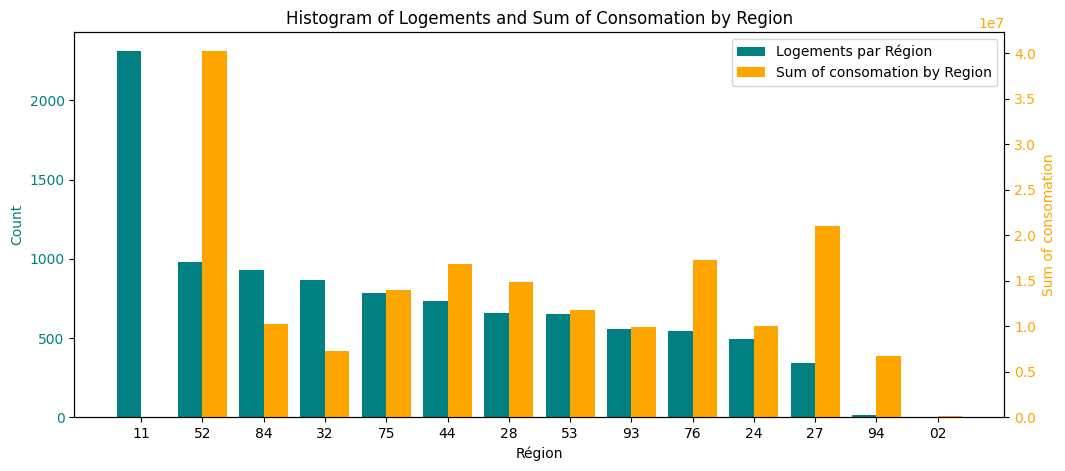

In [56]:
fig, ax1 = plt.subplots(1,1, figsize=(12, 5))
bar_width = 0.4

#Nombre de logements par région (axe des ordonnées à gauche)
val_region = df_DPE['N°_région_(BAN)'].value_counts()
bar_positions1 = np.arange(len(val_region))
ax1.bar(bar_positions1, val_region, width=bar_width, color='teal', label='Logements par Région')
ax1.set_xlabel('Région')
ax1.set_ylabel('Count', color='teal')
ax1.tick_params(axis='y', labelcolor='teal')
ax1.set_title('Histogram of Logements and Sum of Consomation by Region')

#deuxième axe des ordonnées (à droite)
ax2 = ax1.twinx()

#conso par région (axe des ordonnées à droite )
comptage_conso_region = df_DPE.groupby('N°_région_(BAN)')['Conso_5_usages_é_finale'].sum()
bar_positions2 = bar_positions1 + bar_width
ax2.bar(bar_positions2, comptage_conso_region, width=bar_width, color='orange', label='Sum of consomation by Region')
ax2.set_ylabel('Sum of consomation', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

lines, labels = ax1.get_legend_handles_labels() #légende
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

ax1.set_xticks(bar_positions1 + bar_width / 2)
ax1.set_xticklabels(val_region.index)

plt.show()

In [63]:
# reparésenation des logements sur une carte :

    # représentation des DPE sur une carte :

    # représentation des conso sur une carte :

    # mise en relation DPE et Altitude ( regression simple du DPE sur l'altiude par le MCO)
    # mise en relation conso et Altitude ( regression simple de la conso sur l'altiude par le MCO)


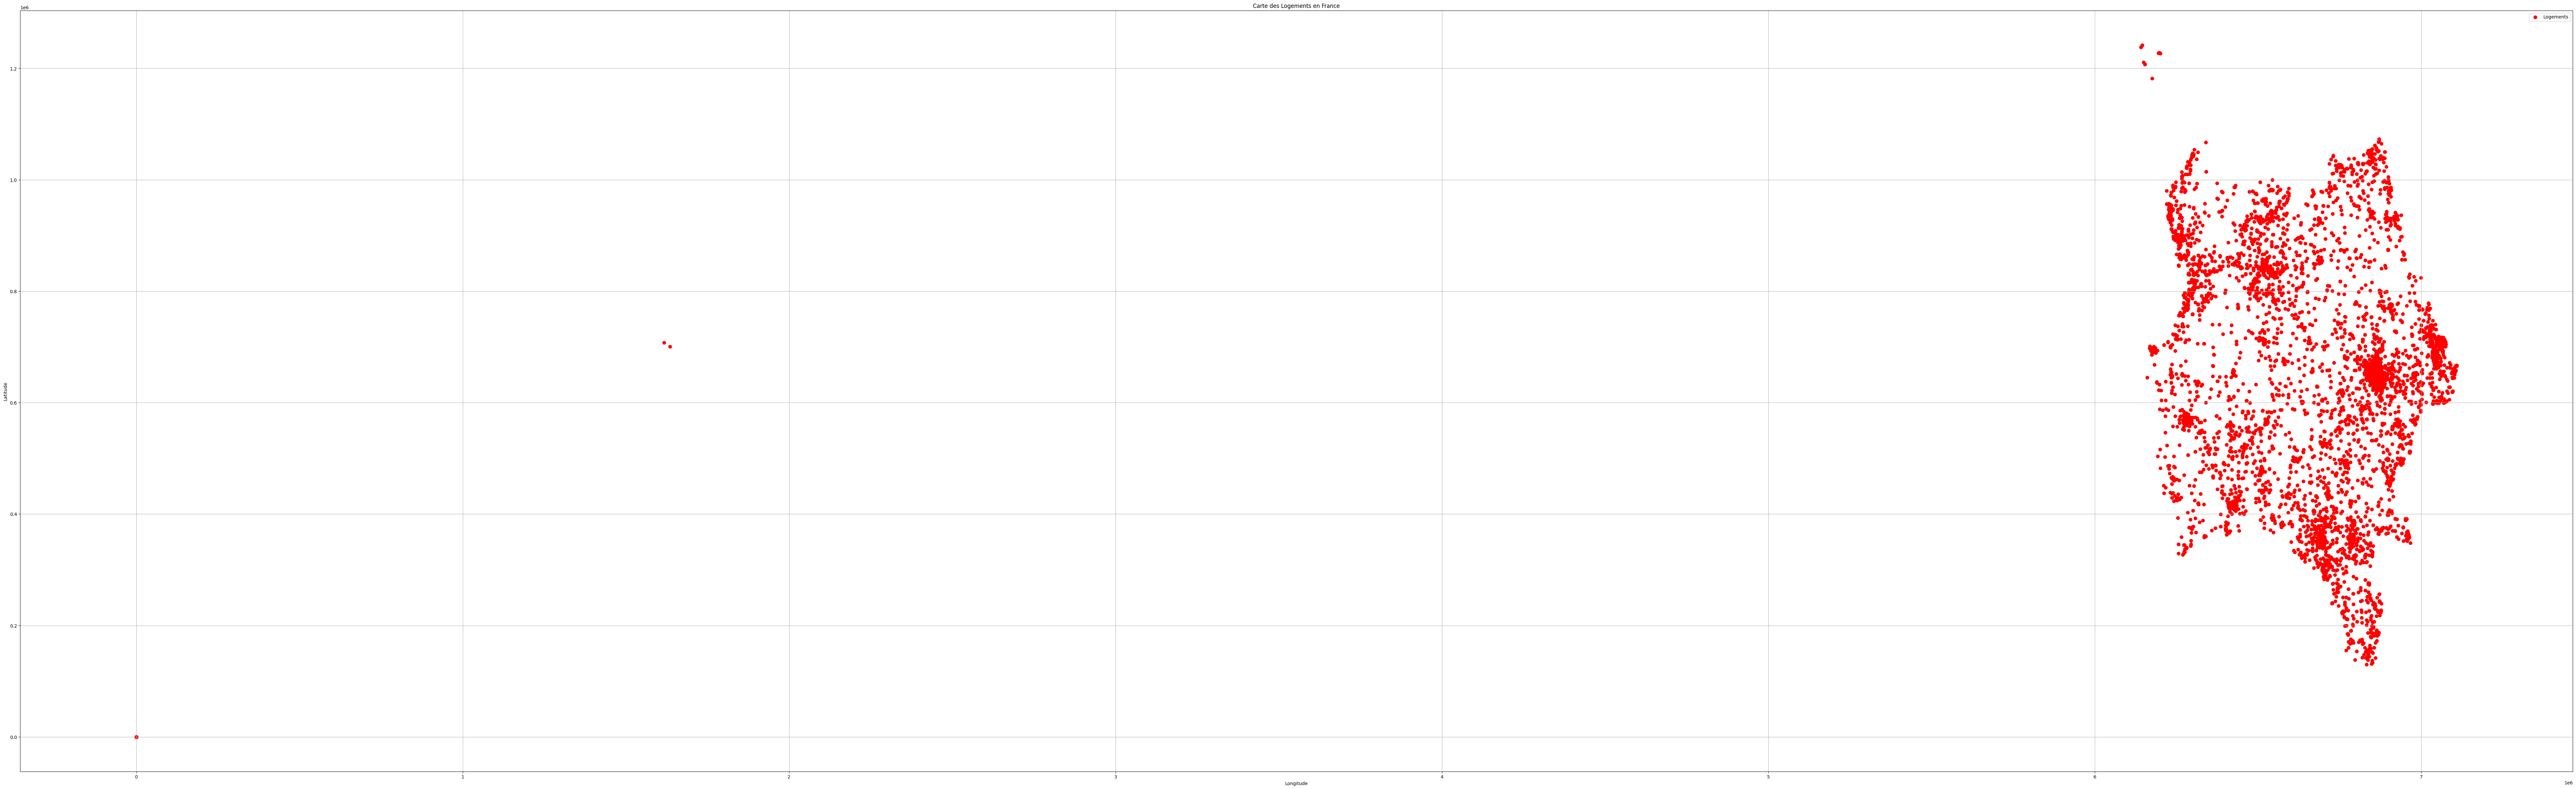

In [74]:
latitude = df_DPE['Coordonnée_cartographique_X_(BAN)']
longitude = df_DPE['Coordonnée_cartographique_Y_(BAN)']

#carte de la France
plt.figure(figsize=(100, 30))
plt.scatter(longitude, latitude, color='red', marker='o', s=50, label='Logements')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Carte des Logements en France')
plt.legend()
plt.grid(True)
plt.show()

/Users/aminerazig/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


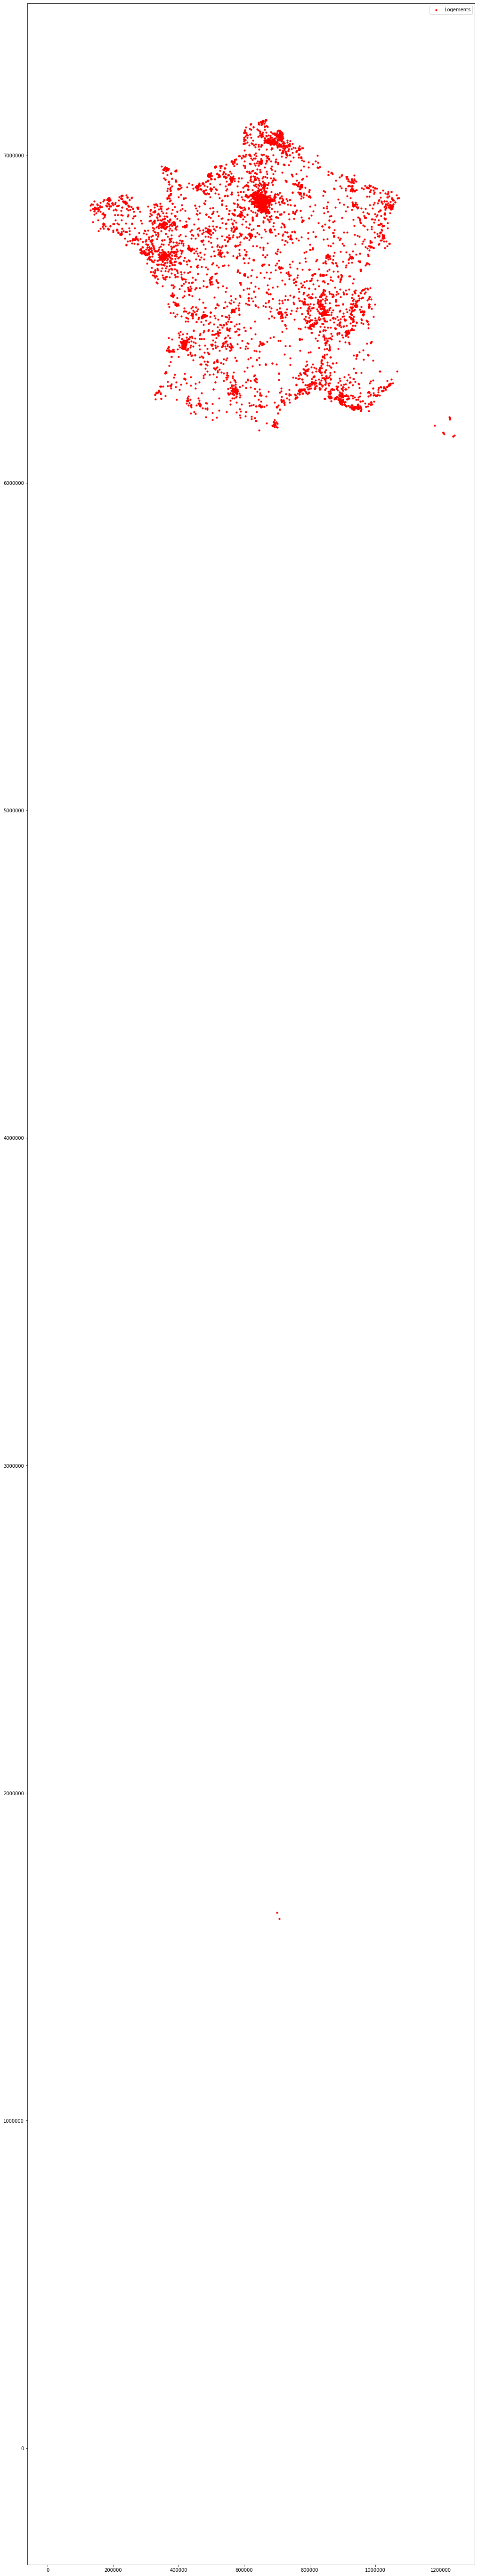

In [12]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Supposons que vous avez un GeoDataFrame avec des colonnes 'geometry', 'Nom_logement', 'Latitude', 'Longitude'
# Assurez-vous que la colonne 'geometry' contient des objets de type Point

# Créer un GeoDataFrame à partir de vos données
gdf = gpd.GeoDataFrame(df_DPE, geometry=gpd.points_from_xy(df_DPE['Coordonnée_cartographique_X_(BAN)'], df_DPE['Coordonnée_cartographique_Y_(BAN)']))

# Charger une carte de la France (par exemple, une carte des départements)
france_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Afficher la carte de la France
ax = france_map.plot(figsize=(100, 100), color='lightgrey')

# Ajouter les logements sur la carte
gdf.plot(ax=ax, marker='o', color='red', markersize=10, label='Logements')

# Ajouter une légende
plt.legend()

# Afficher la carte
plt.show()

In [11]:
explodata.create_unique(df_DPE)


,Column_name,Data_type,Number_of_unique,Number_of_missing,Percentage_of_missing,Unique_values
0,Type_énergie_n°1,object,12,0,0.000000,"[Gaz naturel, Réseau de Chauffage urbain, Élec..."
1,Coût_total_5_usages_énergie_n°2,float64,5124,1770,0.181893,More than 15 unique values
2,Nom__commune_(BAN),object,3623,71,0.007296,More than 15 unique values
3,Coût_total_5_usages_énergie_n°1,float64,6789,0,0.000000,More than 15 unique values
4,Qualité_isolation_enveloppe,object,4,0,0.000000,"[insuffisante, très bonne, bonne, moyenne]"
5,Type_installation_ECS,object,3,45,0.004624,"[installation individuelle, nan, installation ..."
6,Coût_total_5_usages,float64,6868,0,0.000000,More than 15 unique values
7,Emission_GES_5_usages,float64,8220,0,0.000000,More than 15 unique values
8,Qualité_isolation_menuiseries,object,4,0,0.000000,"[bonne, moyenne, très bonne, insuffisante]"
9,Qualité_isolation_murs,object,4,0,0.000000,"[insuffisante, très bonne, moyenne, bonne]"


# MODELISATION 

## Linear Regression (OLS)
    => Develloping a simple modelisation using variuous resgressors of the data base in the aim to predict the electric consimption 

Target variable : 

- *conso*

Liste of regressors : 

- *taille logement *
- *zone géographique* =>(peut etre creer une varaible température moyenne dans la région)
- *qualité isolation* 
- *année de construction* 




In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming df is your DataFrame with the specified columns
# 'Conso_5_usages_é_finale', 'Surface_habitable_logement', 'Année_construction'
df_OLS = df_DPE.copy()
# Handle missing values
df_OLS.dropna(subset=['Surface_habitable_logement', 'Année_construction', 'Zone_climatique__encoded', 'Qualité_isolation_murs_encoded', 'Conso_5_usages_é_finale'], inplace=True)

# Select the dependent variable and independent variables
X = df_OLS[['Surface_habitable_logement', 'Année_construction', 'Zone_climatique__encoded', 'Qualité_isolation_murs_encoded']]
y = df_OLS['Conso_5_usages_é_finale']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error: {rmse}")

# Print the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Root Mean Squared Error: 11137.536324439738
Coefficients: [   69.62553974  -163.77021986  -159.56448382 -1676.57978954]
Intercept: 333493.1204871391


Analyse de corrélations (via des graphes et probablement une carte)

In [262]:
# Répartition des données entre données d’entrainement et celles de validation
x=df.iloc[:,[5,6,7,12,13,14,15,16,17,19,20]]
y=df["Etiquette_DPE"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1)


In [280]:
#instanciation
model_DT = DecisionTreeClassifier()
#training
model_DT.fit(X_train, y_train)
#Prédiction
prediction = model_DT.predict(X_test)
# Evaluation
print(model_DT.score(X_train, y_train))
print(model_DT.score(X_test, y_test))

scores = cross_val_score(model_DT, x, y, cv=5)
print(scores)

# MAUVAISE PERFORMANCE (OVERFITTING)


0.990755535265921
0.4948665297741273
[0.50256674 0.48741654 0.49357987 0.46533128 0.47817155]


In [279]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)  # Vous pouvez ajuster les hyperparamètres selon vos besoins

# Entraînez le classificateur sur l'ensemble d'entraînement
clf.fit(X_train, y_train)

# Faites des prédictions sur l'ensemble de test
y_pred = clf.predict(X_test)

# Évaluez les performances du modèle
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# A REVOIR, JE COMPRENDS PAS TROP CES GRANDEURS

Accuracy: 0.5523613963039015
Classification Report:
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         6
           B       0.70      0.50      0.58        32
           C       0.73      0.73      0.73       332
           D       0.50      0.60      0.54       284
           E       0.43      0.41      0.42       189
           F       0.30      0.25      0.27        72
           G       0.39      0.22      0.28        59

    accuracy                           0.55       974
   macro avg       0.43      0.39      0.40       974
weighted avg       0.55      0.55      0.55       974

Confusion Matrix:
[[  0   2   3   1   0   0   0]
 [  0  16  11   5   0   0   0]
 [  1   3 243  67  17   1   0]
 [  0   1  61 171  38  11   2]
 [  0   1   9  68  77  22  12]
 [  0   0   2  20  26  18   6]
 [  0   0   3  12  23   8  13]]
